In [1]:
import os
import glob
import netCDF4
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import gridspec
from matplotlib.animation import FuncAnimation
import cartopy.crs as ccrs
import cartopy.feature
import seaborn as sns

import wrf
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
import matplotlib.ticker as mticker
import matplotlib.colors

In [2]:
######################
# FUNCTIONS
######################

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

In [3]:
######################
# ANT
#Parameters
folder_mod = '/capstor/scratch/cscs/gsergi/OUTPUT_PGW_20220315/ANT_20220315_'
domain = 'd01'
nlayers = 100
acc_t = 1440 #minutes
ini_date_idx=0
#end_date_idx=0

###load data###
snpack_files = '/snpack/snowpack_'+domain+'_*'# Load netcdf
outhist_files = '/outhist/outhist_'+domain+'_*'# Load netcdf

################
#hist
print('Charging Ant hist...')
wrflist_sp = []
proj = 'hist'
print('Total: ' + str(np.size(glob.glob(folder_mod+proj+snpack_files))))
for i,ncdf_oh in enumerate(np.sort(glob.glob(folder_mod+proj+snpack_files))):
        print(i, end="\r")
        wrflist_sp.append(netCDF4.Dataset(ncdf_oh))
    
# Get surface variables
sp_T_hist = wrf.getvar(wrflist_sp, 'SNPACK_T', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:nlayers,:,:] -273.15
x =  wrf.getvar(wrflist_sp, 'SN_THICK', timeidx=wrf.ALL_TIMES)[:,:nlayers+1,:,:].cumsum(axis=1)
sp_depth_hist = (x[:,1:,:,:] + x[:,:-1,:,:]) / 2

#hist
wrflist_oh = []
proj = 'hist'
print('Total: ' + str(np.size(glob.glob(folder_mod+proj+outhist_files))))
for i,ncdf_oh in enumerate(np.sort(glob.glob(folder_mod+proj+outhist_files))):
        print(i, end="\r")
        wrflist_oh.append(netCDF4.Dataset(ncdf_oh))
    
# Get surface variables
t2_ant_hist = wrf.getvar(wrflist_oh, 'T2', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:]

################
#past
print('Charging Ant past...')
wrflist_sp = []
proj = 'past_new'
print('Total: ' + str(np.size(glob.glob(folder_mod+proj+snpack_files))))
for i,ncdf_oh in enumerate(np.sort(glob.glob(folder_mod+proj+snpack_files))):
        print(i, end="\r")
        wrflist_sp.append(netCDF4.Dataset(ncdf_oh))
    
# Get surface variables
sp_T_past = wrf.getvar(wrflist_sp, 'SNPACK_T', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:nlayers,:,:] -273.15
x =  wrf.getvar(wrflist_sp, 'SN_THICK', timeidx=wrf.ALL_TIMES)[:,:nlayers+1,:,:].cumsum(axis=1)
sp_depth_past = (x[:,1:,:,:] + x[:,:-1,:,:]) / 2

#hist
wrflist_oh = []
proj = 'past_new'
print('Total: ' + str(np.size(glob.glob(folder_mod+proj+outhist_files))))
for i,ncdf_oh in enumerate(np.sort(glob.glob(folder_mod+proj+outhist_files))):
        print(i, end="\r")
        wrflist_oh.append(netCDF4.Dataset(ncdf_oh))
    
# Get surface variables
t2_ant_past = wrf.getvar(wrflist_oh, 'T2', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:]

################
#ssp245
print('Charging Ant ssp245...')
wrflist_sp = []
proj = 'ssp245_new'
print('Total: ' + str(np.size(glob.glob(folder_mod+proj+snpack_files))))
for i,ncdf_oh in enumerate(np.sort(glob.glob(folder_mod+proj+snpack_files))):
        print(i, end="\r")
        wrflist_sp.append(netCDF4.Dataset(ncdf_oh))
    
# Get surface variables
sp_T_ssp245 = wrf.getvar(wrflist_sp, 'SNPACK_T', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:nlayers,:,:] -273.15
x =  wrf.getvar(wrflist_sp, 'SN_THICK', timeidx=wrf.ALL_TIMES)[:,:nlayers+1,:,:].cumsum(axis=1)
sp_depth_ssp245 = (x[:,1:,:,:] + x[:,:-1,:,:]) / 2

#ssp245
wrflist_oh = []
proj = 'ssp245_new'
print('Total: ' + str(np.size(glob.glob(folder_mod+proj+outhist_files))))
for i,ncdf_oh in enumerate(np.sort(glob.glob(folder_mod+proj+outhist_files))):
        print(i, end="\r")
        wrflist_oh.append(netCDF4.Dataset(ncdf_oh))
    
# Get surface variables
t2_ant_ssp245 = wrf.getvar(wrflist_oh, 'T2', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:]

################
#ssp585
print('Charging Ant ssp585...')
wrflist_sp = []
proj = 'ssp585_new'
print('Total: ' + str(np.size(glob.glob(folder_mod+proj+snpack_files))))
for i,ncdf_oh in enumerate(np.sort(glob.glob(folder_mod+proj+snpack_files))):
        print(i, end="\r")
        wrflist_sp.append(netCDF4.Dataset(ncdf_oh))
    
# Get surface variables
sp_T_ssp585 = wrf.getvar(wrflist_sp, 'SNPACK_T', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:nlayers,:,:] -273.15
x =  wrf.getvar(wrflist_sp, 'SN_THICK', timeidx=wrf.ALL_TIMES)[:,:nlayers+1,:,:].cumsum(axis=1)
sp_depth_ssp585 = (x[:,1:,:,:] + x[:,:-1,:,:]) / 2

#ssp585
wrflist_oh = []
proj = 'ssp585_new'
print('Total: ' + str(np.size(glob.glob(folder_mod+proj+outhist_files))))
for i,ncdf_oh in enumerate(np.sort(glob.glob(folder_mod+proj+outhist_files))):
        print(i, end="\r")
        wrflist_oh.append(netCDF4.Dataset(ncdf_oh))
    
# Get surface variables
t2_ant_ssp585 = wrf.getvar(wrflist_oh, 'T2', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:]

######################
# ANT COORDINATES
# Get surface fix variables
height = wrf.getvar(wrflist_sp, 'HGT', timeidx=0, method="cat")[:,:]
# Get dimension
lats, lons = wrf.latlon_coords(sp_T_hist)
times = wrf.extract_times(wrflist_sp, timeidx=wrf.ALL_TIMES)

Charging Ant hist...
Total: 59
Total: 59
Charging Ant past...
Total: 59
Total: 59
Charging Ant ssp245...
Total: 59
Total: 59
Charging Ant ssp585...
Total: 60
Total: 59


In [4]:
######################
# ANT
### Charge new density file
file_dens05m_hist = 'dens05m_hist.nc'
file_dens05m_past = 'dens05m_past.nc'
sp_dens05m_hist = netCDF4.Dataset(file_dens05m_hist)
sp_dens05m_past = netCDF4.Dataset(file_dens05m_past)

In [5]:
#Positions
CON_xy = wrf.ll_to_xy(wrflist_sp, -75.09978, 123.332196) #Concordia
CON_ll = wrf.xy_to_ll(wrflist_sp, CON_xy[0], CON_xy[1])
DDU_xy = wrf.ll_to_xy(wrflist_sp, -66.662778, 140.001111) #DDU
DDU_ll = wrf.xy_to_ll(wrflist_sp, DDU_xy[0], DDU_xy[1])
CIS_xy = wrf.ll_to_xy(wrflist_sp, -66.033333, 103.55) #DDU
CIS_ll = wrf.xy_to_ll(wrflist_sp, CIS_xy[0], CIS_xy[1])

In [6]:
#Positions
CON_xy = wrf.ll_to_xy(wrflist_oh, -75.09978, 123.332196) #Concordia
CON_ll = wrf.xy_to_ll(wrflist_oh, CON_xy[0], CON_xy[1])

#Positions
WIL_xy = wrf.ll_to_xy(wrflist_oh, -70.000, 130.000) #Wilkes
WIL_ll = wrf.xy_to_ll(wrflist_oh, WIL_xy[0], WIL_xy[1])

#Times mean
tini = np.where(times == np.datetime64('2022-03-17T00'))[0][0]
tend = np.where(times == np.datetime64('2022-03-20T00'))[0][0]

#Times Timeseries
tiniTS = np.where(times == np.datetime64('2022-03-10T00'))[0][0]
tendTS = np.where(times == np.datetime64('2022-03-25T00'))[0][0]

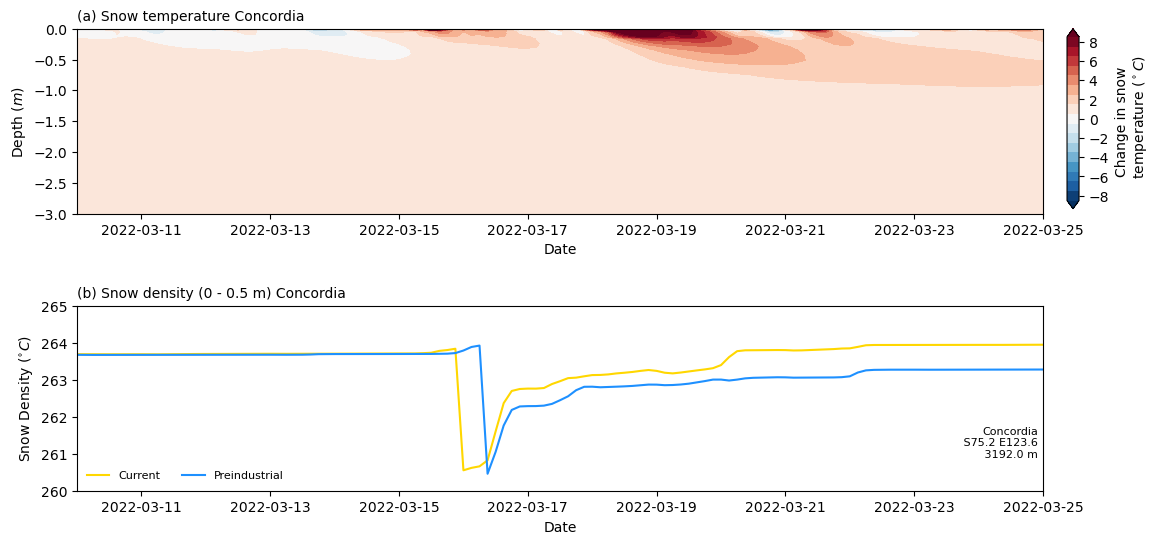

In [8]:
#############################################
# Plot terrein map
#############################################

min_height = 10
time_ini = 39

#Regular depth space
xdepths = np.geomspace(0.02,5,num=30)
  
######################################################
### Plot Starting
#Figure and axis
fig = plt.figure(figsize=[12,6])
spec = gridspec.GridSpec(ncols=1, nrows=2, figure=fig, hspace= 0.5, wspace=0.2)

### Background
ax1 = fig.add_subplot(spec[0, :])
ax2 = fig.add_subplot(spec[1, :])

####################################################
#PLOT Variables

#-------------------------------------------
#Temperature Concordia
sp_T_hist_linspace = np.zeros((len(times), len(xdepths)))
sp_T_past_linspace = np.zeros((len(times), len(xdepths)))
for i,time in enumerate(times[:-1]):
    if sp_depth_hist[i, 1:, CON_xy[1], CON_xy[0]][-1]<0:
        depth_end_ix = np.where((sp_depth_hist[i, 1:, CON_xy[1], CON_xy[0]] - sp_depth_hist[i, :-1, CON_xy[1], CON_xy[0]]) < 0)[0][0]
    else:
        depth_end_ix = -1
    sp_T_hist_linspace[i,:] = np.interp(xdepths, sp_depth_hist[i, :depth_end_ix, CON_xy[1], CON_xy[0]], sp_T_hist[i, :depth_end_ix, CON_xy[1], CON_xy[0]])
    sp_T_past_linspace[i,:] = np.interp(xdepths, sp_depth_past[i, :depth_end_ix, CON_xy[1], CON_xy[0]], sp_T_past[i, :depth_end_ix, CON_xy[1], CON_xy[0]])
fill1 = ax1.contourf(times,-xdepths, sp_T_hist_linspace.T-sp_T_past_linspace.T, levels=np.arange(-8.5,8.6,1), cmap='RdBu_r', extend='both')

ax1.set_xlabel('Date')
ax1.set_ylabel('Depth ($m$)', fontsize=10)
ax1.set_ylim(-3, 0)
ax1.set_xlim(times[tiniTS], times[tendTS])

#-------------------------------------------
#Snow density Concordia
ax2.plot(times[:-1], sp_dens05m_hist['dens05m_hist'][:,CON_xy[1],CON_xy[0]], c='Gold', label='Current')
ax2.plot(times[:-1], sp_dens05m_past['dens05m_past'][:,CON_xy[1],CON_xy[0]], c='DodgerBlue', label='Preindustrial')

ax2.text(.995, .35, 'Concordia' + '\n S' + str(-np.round(CON_ll[0].values,1)) + ' E' + str(np.round(CON_ll[1].values,1)) + '\n ' + str(np.round(height[CON_xy[1], CON_xy[0]].values, 0)) + ' m',
    horizontalalignment='right', verticalalignment='top', transform=ax2.transAxes, fontsize=8)
ax2.legend(ncol=2, loc='lower left', frameon=False, fontsize=8)

ax2.set_xlabel('Date')
ax2.set_ylabel('Snow Density ($^{\circ} C$)')
ax2.set_ylim(260, 265)
ax2.set_xlim(times[tiniTS], times[tendTS])

####################################################
# PLOT Parameters
ax1.set_title('(a) Snow temperature Concordia', loc='left', fontsize=10)
ax2.set_title('(b) Snow density (0 - 0.5 m) Concordia', loc='left', fontsize=10)

fig.subplots_adjust(right=0.93)
cbar_ax_1 = fig.add_axes([0.95, 0.58, 0.01, 0.3])
cbar_1 = fig.colorbar(fill1, cax=cbar_ax_1, orientation = 'vertical', shrink=0.5, pad=0)
cbar_1.set_label('Change in snow \n temperature ($^\circ C$)', labelpad=4, fontsize=10)
cbar_1.set_ticks(np.arange(-8,8.1,2), fontsize=8)

plt.savefig('Extended_Figure_3.png', dpi=300, bbox_inches = 'tight')